In [3]:
from sklearn.svm import SVC as SVM

# Recognize digits

## pre-requisite

In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

/home/cnzero/anaconda3/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## dataset

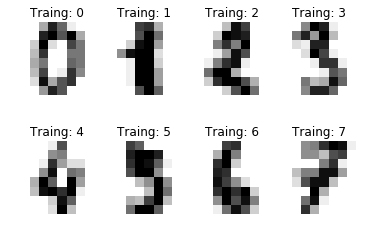

In [7]:
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Traing: %i' % label)

### Info of `digits`

In [41]:
# print(digits.DESCR)
print('target names: ', digits.target_names)
print('data: ', digits.data.shape)
print('images: ', digits.images.shape)
print('target: ', digits.target.shape)

target names:  [0 1 2 3 4 5 6 7 8 9]
data:  (1797, 64)
images:  (1797, 8, 8)
target:  (1797,)


In [8]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [9]:
classifier = svm.SVC(gamma=0.001)
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
print('training accuracy: ', classifier.score(data[:n_samples // 2], digits.target[:n_samples // 2]))
print('testing  accuracy: ', classifier.score(data[n_samples // 2:], digits.target[n_samples // 2:]))

training accuracy:  0.9988864142538976
testing  accuracy:  0.9688542825361512


In [10]:
expected = digits.target[n_samples//2:]
predicted = classifier.predict(data[n_samples//2:])

In [11]:
print('Classification report for classifier %s: \n %s \n' % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False): 
              precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899
 



In [12]:
print('Confusion matrix: \n %s' % metrics.confusion_matrix(expected, predicted))

Confusion matrix: 
 [[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


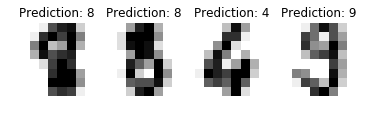

In [13]:
images_and_predictions = list(zip(digits.images[n_samples//2:], predicted))

for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index+5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)